<a href="https://colab.research.google.com/github/freedom-780/A_B_test-/blob/main/food_waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction 

In [ ]:
# import packages 
import pandas as pd 
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# import data into a dataframe
food_waste_data = "https://raw.githubusercontent.com/freedom-780/foodwaste_capstone_project/main/food_waste_data.csv"
food_waste_df = pd.read_csv(food_waste_data)

In [ ]:
# make a copy of the original dataframe for analysis
df = food_waste_df.copy()

In [101]:
# explore the dataset 
df.sample(5).head().T

,7588,7426,4329,6325,6512
year,2011,2011,2015,2012,2012
sector,Residential,Foodservice,Retail,Farm,Foodservice
sub_sector,Not Applicable,Limited Service Restaurants,Not Applicable,Not Applicable,Limited Service Restaurants
sub_sector_category,Not Applicable,Asian/noodle,Not Applicable,Not Applicable,All Other
food_type,Dry Goods,Ready-to-drink Beverages,Dry Goods,Produce,Dairy & Eggs
food_category,Salad Toppings,Not Applicable,Cereal,Lemons,Not Applicable
tons_supply,"46,408.22","36,085.86","1,686,822.51","1,105,113.29","827,110.73"
tons_surplus,"6,497.15",852.29,"34,748.54","330,405.87","19,535.12"
us_dollars_surplus,"87,626,468.21","4,366,030.49","211,951,749.10","183,594,368.70","35,370,794.64"
tons_waste,"4,363.80",563.36,"12,162.53","307,367.65","16,449.19"


In [ ]:
# drop the columns that are not needed for this analysis 

df.drop(df.columns \
.difference(['year','sector','sub_sector','sub_sector_category','food_type', 'food_category','tons_supply','tons_surplus', \
       'us_dollars_surplus','tons_waste', 'total_mtco2e_footprint', 'meals_wasted']), 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9035 entries, 0 to 9034
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    9035 non-null   int64  
 1   sector                  9035 non-null   object 
 2   sub_sector              9035 non-null   object 
 3   sub_sector_category     9035 non-null   object 
 4   food_type               9035 non-null   object 
 5   food_category           9035 non-null   object 
 6   tons_supply             9035 non-null   float64
 7   tons_surplus            9035 non-null   float64
 8   us_dollars_surplus      9035 non-null   float64
 9   tons_waste              9035 non-null   float64
 10  total_mtco2e_footprint  9035 non-null   float64
 11  meals_wasted            9035 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 847.2+ KB


In [52]:
# Change the sector object dtypes to categories

df_change_dtpye = {'sector':'category',
                   'sub_sector':'category',
                   'sub_sector_category':'category',
                   'food_type':'category',
                   'food_category':'category'

                   }



In [53]:
df = df.astype(df_change_dtpye)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9035 entries, 0 to 9034
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   year                    9035 non-null   int64   
 1   sector                  9035 non-null   category
 2   sub_sector              9035 non-null   category
 3   sub_sector_category     9035 non-null   category
 4   food_type               9035 non-null   category
 5   food_category           9035 non-null   category
 6   tons_supply             9035 non-null   float64 
 7   tons_surplus            9035 non-null   float64 
 8   us_dollars_surplus      9035 non-null   float64 
 9   tons_waste              9035 non-null   float64 
 10  total_mtco2e_footprint  9035 non-null   float64 
 11  meals_wasted            9035 non-null   float64 
dtypes: category(5), float64(6), int64(1)
memory usage: 560.0 KB


In [59]:
df.sample(5).head()

,year,sector,sub_sector,sub_sector_category,food_type,food_category,tons_supply,tons_surplus,us_dollars_surplus,tons_waste,total_mtco2e_footprint,meals_wasted
4075,2015,Residential,Not Applicable,Not Applicable,Fresh Meat & Seafood,Meat Alternatives,"9,329.82","1,865.96","20,450,416.50","1,374.77","20,980.49","3,109,939.86"
1148,2018,Foodservice,Limited Service Restaurants,Pizza,Breads & Bakery,Not Applicable,"99,085.88","2,034.25","7,772,970.21","1,718.20","5,103.54","3,305,118.48"
3762,2015,Foodservice,Full Service Restaurants,Varied Menu,Fresh Meat & Seafood,Not Applicable,"1,039,862.33","24,560.00","107,856,984.40","20,646.96","283,277.53","39,898,237.50"
4131,2015,Residential,Not Applicable,Not Applicable,Prepared Foods,Handheld Entrees,"309,096.67","74,183.20","371,573,089.60","55,017.47","444,659.64","123,638,667.40"
6494,2012,Foodservice,Healthcare,Long-term Care,Ready-to-drink Beverages,Not Applicable,"78,549.01","1,618.11","7,094,423.19","1,376.61","5,396.30","2,629,550.16"


In [55]:
df.nunique()

year                        10
sector                       5
sub_sector                  16
sub_sector_category         33
food_type                    8
food_category              287
tons_supply               8664
tons_surplus              9033
us_dollars_surplus        9025
tons_waste                9033
total_mtco2e_footprint    9033
meals_wasted              9033
dtype: int64

In [56]:
# print statistics about mass shootings data

print(f"Shape of food waste data: {food_waste_df.shape}")
print(f"Number of mission values in food waste data: \
{food_waste_df.isnull().sum().sum()}")
print(f"Number of duplicate values in food waste data: \
{food_waste_df.duplicated().sum()}")

Shape of food waste data: (9035, 28)
Number of mission values in food waste data: 0
Number of duplicate values in food waste data: 0


In [61]:
df.groupby(['food_type', 'food_category'])['total_mtco2e_footprint']

In [ ]:
# do some stats on the categories t test, chi, bootstrapping to see the difference in food categories

In [36]:

df.food_type.value_counts(normalize=True )


pandas.core.series.Series

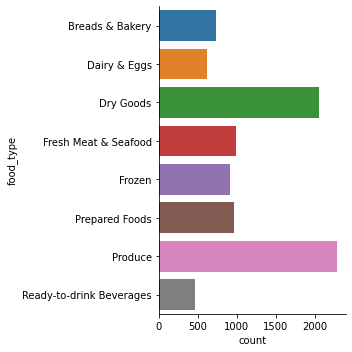

In [72]:
sns.catplot(y ='food_type', data= df, kind ='count')

The categories produce, Dry Goods, and the Fresh Meat & Seafood make up about 50% of the values

In [81]:
pd.DataFrame(df.groupby(['sector', 'food_type'])).describe()

,0,1
count,34,34
unique,34,34
top,"(Farm, Dry Goods)",year sector sub_sector sub_sector_c...
freq,1,1


In [ ]:
pd.set_option('display.max_rows', 1000)

In [ ]:
df.sample(5)

,year,sector,sub_sector,sub_sector_category,food_type,food_category,tons_supply,tons_surplus,us_dollars_surplus,tons_waste,...,tons_incineration,tons_land_application,tons_landfilled,tons_dumping,tons_sewer,upstream_mtco2e_footprint,downstream_mtco2e_footprint,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
881,2019,Retail,Not Applicable,Not Applicable,Produce,Avocados,"750,515.14","142,776.48","680,452,917.40","49,974.00",...,"6,194.10","1,668.41","42,111.50",0.00,0.00,"128,149.52","9,516.01","137,665.53","4,694,926,315.00","192,492,655.80"
10,2019,Farm,Not Applicable,Not Applicable,Produce,Sweet Corn,"3,298,234.04","286,446.75","99,625,325.60","188,396.57",...,420.61,0.00,"3,196.40","34,845.52",0.00,"60,103.90","-20,827.43","39,276.47","7,632,066,513.00","465,938,260.30"
2479,2017,Retail,Not Applicable,Not Applicable,Dry Goods,Coffee Pods,"119,975.68","2,471.50","97,614,165.02",865.06,...,124.82,28.88,711.37,0.00,0.00,"5,376.72",167.08,"5,543.80","193,445,419.30","3,332,099.24"
4940,2014,Residential,Not Applicable,Not Applicable,Dry Goods,Cranberry Sauce,"43,119.85","7,843.37","25,304,108.44","5,267.99",...,718.81,0.00,"3,726.88",0.00,822.30,"34,404.14",964.85,"35,368.99","758,913,128.90","13,072,286.06"
5342,2014,Retail,Not Applicable,Not Applicable,Produce,Sweet Corn,"435,191.92","9,614.08","13,618,140.19","3,365.08",...,419.73,112.34,"2,833.00",0.00,0.00,"8,629.15",640.77,"9,269.92","316,140,258.40","12,961,796.18"


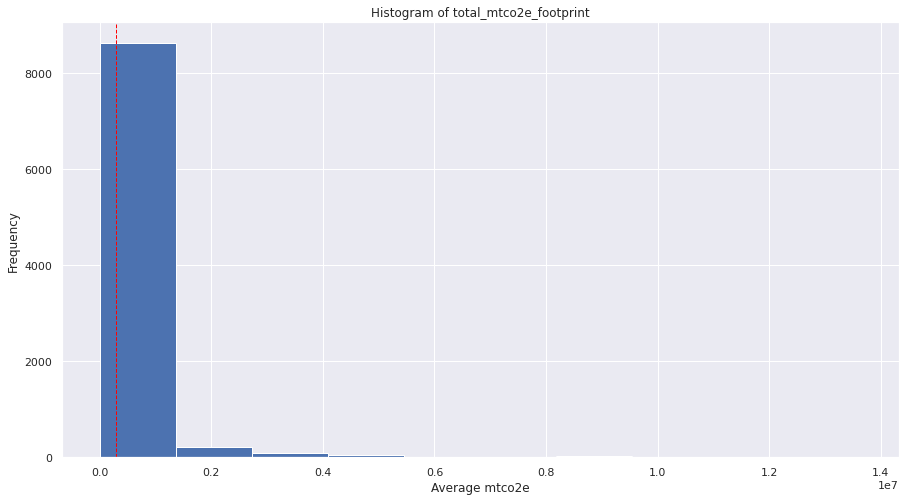

In [105]:
plt.hist(df.total_mtco2e_footprint)
plt.axvline(df.total_mtco2e_footprint.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Histogram of total_mtco2e_footprint")
plt.xlabel("Average mtco2e")
plt.ylabel("Frequency")
plt.show();

<Figure size 1080x576 with 0 Axes>

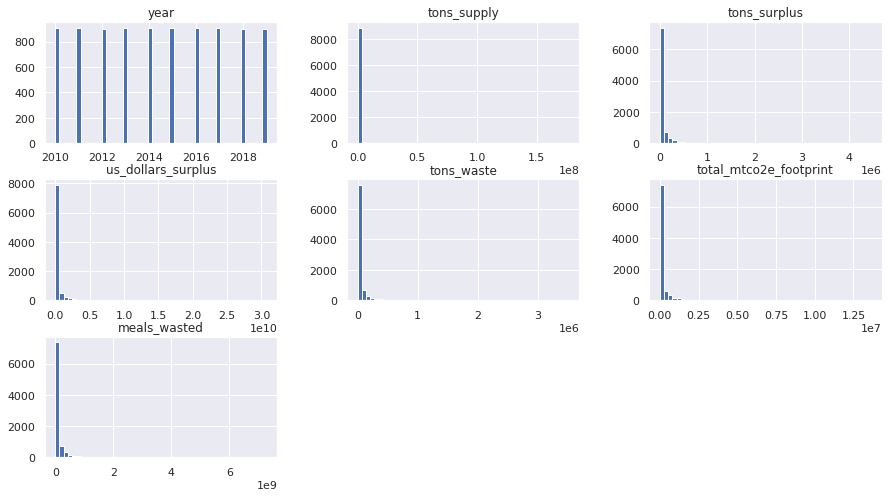

In [106]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.tight_layout()
df.hist(bins = 50);


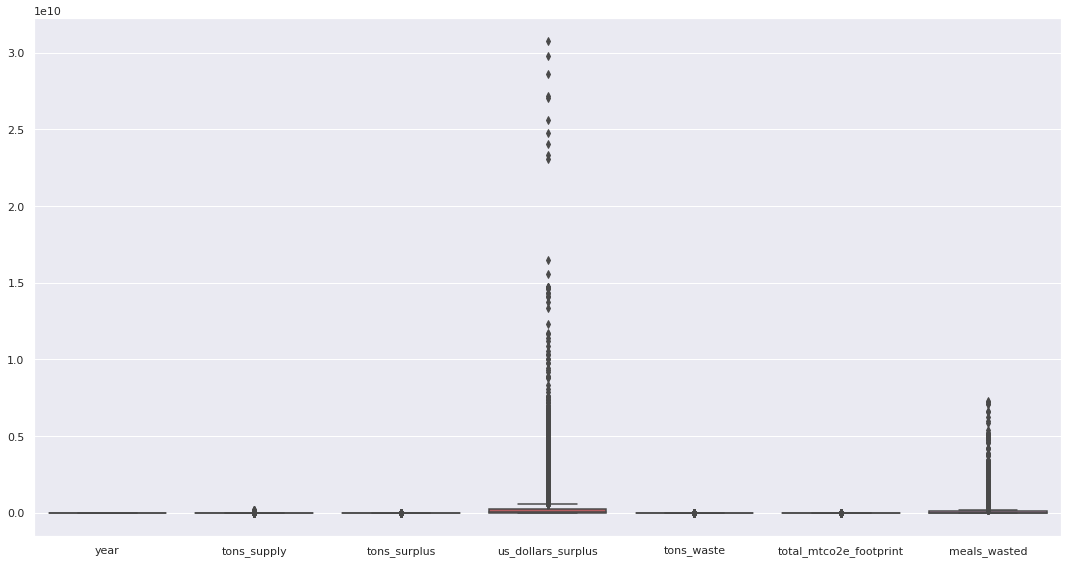

In [119]:
sns.boxplot(data=df)
plt.tight_layout()



Sees like they have pretty much the same distribution but with different scales

In [98]:
df.corr(method="pearson")

,year,tons_supply,tons_surplus,us_dollars_surplus,tons_waste,total_mtco2e_footprint,meals_wasted
year,1.00,0.01,0.01,0.02,0.01,0.01,0.01
tons_supply,0.01,1.00,0.71,0.28,0.57,0.55,0.71
tons_surplus,0.01,0.71,1.00,0.57,0.90,0.78,1.00
us_dollars_surplus,0.02,0.28,0.57,1.00,0.48,0.68,0.58
tons_waste,0.01,0.57,0.90,0.48,1.00,0.68,0.90
total_mtco2e_footprint,0.01,0.55,0.78,0.68,0.68,1.00,0.78
meals_wasted,0.01,0.71,1.00,0.58,0.90,0.78,1.00
